In [19]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('./sorted_diagnosed-authors---submissions.csv')

In [21]:
del df['Unnamed: 0']
# del df['num_comments']

In [22]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.head()

,author,num_comments,selftext,date
0,27_emilys,1,My depression gives me these extremely irratio...,2018-03-15
1,27_emilys,20,"I could lay here for hours, or even all day. I...",2018-03-22
2,27_emilys,0,"I've never really cared much for Easter, but I...",2018-04-01
3,27_emilys,7,I've been extremely depressed for the past 3-4...,2018-04-10
4,27_emilys,7,"What was the ""final straw?"" What made you deci...",2018-04-18


In [6]:
len(df)

589

# posts' length and average per user

In [23]:
from statistics import mean

In [6]:
user_words = {}

for i,a,c,s,d in df.itertuples():
    if a not in user_words:
        user_words[a] = len(s)
    else:
        user_words[a] += len(s)

print(user_words)

{'Ap-a-live': 4287, 'Burneracct1270': 5734, 'CubistIvy': 19341, 'DeeGeeG': 8628, 'DonRawiri': 7712, 'DrewDaPrince': 6880, 'FiatLux831': 6063, 'Ganjanthegr33n': 9761, 'GrumpyPanda13': 18722, 'Ilac21': 10255, 'LadyAwesome713': 23074, 'Roadmapsforthesoul': 6084, 'anxious-wreck': 68793, 'clinically-stoopid': 2221, 'curly_fry_queen': 7270, 'diemortalthotticus': 4629, 'dreaminginkyoto': 2796, 'fairykingz': 3817, 'israelipita': 5939, 'jahsehswife': 4694, 'justanotherdude1988': 4699, 'lalalwhjsj': 3916, 'lotusGirlyGirl': 11135, 'paladin_omega78': 6879, 'rachzilla555': 4186, 'rosy_maplemoth': 3732, 'sparkledstar23': 6593, 'taddysad': 6020, 'throwaway755403': 17174, 'versacek9': 23258, 'vvvrrrttt': 30088, 'Mordcrest': 21603, 'Mtaskofa': 11411, 'Wendy_Clear': 18928, 'Lauraanthony209': 76311, 'dreworbuskeridunno': 25564, 'Generic_Userboi': 8476, 'xxmilktea': 5523, 'Melchior94': 12583, 'Planetof12': 14424, 'itsmealvise': 9819}


In [9]:
below = []
THRESHOLD = 2000

for user in user_words:
    if user_words[user] <= THRESHOLD:
        below.append(user)
print(f"This dataset contains {len(below)} posts below {THRESHOLD}")

# BOTH DATASETS --> This dataset contains 0 posts below 2000

This dataset contains 0 posts below 2000


In [10]:
# CREATE A DICTIONARY OF USERS AND OVERALL LENGTH OF THEIR POSTS
authors = {}

for i,a,c,s,d in df.itertuples():
    if a not in authors:
        length = []
        authors[a] = length
    else:
        length.append(len(s))


# REPLACE THE VALUES WITH THE AVERAGE
post_average_length = {}

for user in authors:
    if user not in post_average_length:
        post_average_length[user] = round(mean(authors[user]),2)

print(post_average_length)

{'27_emilys': 506.46, 'AcademicTrash__': 2360.62, 'Alexapro_': 664.57, 'AnonymousPerson001': 300.71, 'ArialB': 585.33, 'Mozartmoonlight': 1138.67, 'OliSoul': 927.41, 'Peacefighter1': 187.97, 'Plastic_book': 869, 'ReddyReddit91': 820.25, 'Richte36': 741.32, 'SirAmbigious': 346.4, 'SirReadsALot92': 319.14, 'TheLifeisgood72': 1062.2, 'ToyboxOfThoughts': 650.17, 'Yvanne': 663.41, 'Zonta1': 280.9, 'iliterallydontexist': 578.11, 'indieidealist': 600.6, 'ineedanewthrowawy': 816.8, 'jfruedam': 2697.4, 'justignoreme003': 225, 'myliferollercoaster': 815.59, 'overwhelmed13': 786.25, 'perfectcontrarian': 516.4, 'shiberino18': 305, 'sweetztheloli': 924.6, 'witchofthewoods89': 281.51, 'AllergicToChicken69': 540.33, 'RayDelMar_0': 1223.27}


In [30]:
def average_length(corpus):
    length = [len(post) for post in corpus]
    return round(mean(length),2), sum(length)

In [14]:
# DATASET AVERAGE LENGHT
average_length(df['selftext'])

# DEPRESSED
# (932.13, 549022)

# NOT DEPRESSED
# (612.21, 360590)

(612.21, 360590)

# text pre-processing

In [24]:
import custom_text_normalizer as tn

In [25]:
normalized_corpus = tn.normalize_corpus(df['selftext'])
# df['norm_text'] = [post for post in normalized_corpus]

In [9]:
print(f"total post: {len(normalized_corpus)}")
# diagnosed --> total post: 589
# not depressed/diagnosed --> total post: 591

total post: 589


In [33]:
authors = []
for user in df['author']:
    if user not in authors:
        authors.append(user)
        
print(f"total user: {len(authors)}")

# diagnosed --> total user 41
# not diagnosed --> total user: 30

total user: 41


In [20]:
print(authors)

['27_emilys', 'AcademicTrash__', 'Alexapro_', 'AnonymousPerson001', 'ArialB', 'Mozartmoonlight', 'OliSoul', 'Peacefighter1', 'Plastic_book', 'ReddyReddit91', 'Richte36', 'SirAmbigious', 'SirReadsALot92', 'TheLifeisgood72', 'ToyboxOfThoughts', 'Yvanne', 'Zonta1', 'iliterallydontexist', 'indieidealist', 'ineedanewthrowawy', 'jfruedam', 'justignoreme003', 'myliferollercoaster', 'overwhelmed13', 'perfectcontrarian', 'shiberino18', 'sweetztheloli', 'witchofthewoods89', 'AllergicToChicken69', 'RayDelMar_0']


# sentiment analysis

In [26]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from statistics import mean

In [27]:
def get_sentiment(text):
    
    """ 
    Apply this function on single sentences.
    It returns a compound score
    """
    
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(text)['compound']
    
    return round(score,3)

In [28]:
def average_sentiment(text):
    
    """ 
    Apply this function on full text to analyze each sentence. 
    It returns the mean sentiment for that text
    """
    
    sentences = nltk.sent_tokenize(text)
    
    if len(sentences) > 1:
        score = [get_sentiment(sent) for sent in sentences]
        return round(mean(score),3)
    return get_sentiment(text)

In [29]:
df['senti_score'] = [average_sentiment(post) for post in normalized_corpus]

In [30]:
df.head()
# 0 	27_emilys 	1 	My depression gives me these extremely irratio... 	2018-03-15 	-0.952
# 0 	Ap-a-live 	0 	Sometimes I feel I have the destiny of a philo... 	2018-06-12 	-0.599

,author,num_comments,selftext,date,senti_score
0,Ap-a-live,0,Sometimes I feel I have the destiny of a philo...,2018-06-12,-0.599
1,Ap-a-live,8,"Hi everybody, I am new in this sub and I hope ...",2018-08-08,-0.989
2,Ap-a-live,0,For a long time I suffer from anxiety and ocd ...,2019-05-22,-0.877
3,Ap-a-live,0,"So so lonely I am, it is so sad. I would be a ...",2019-06-21,-0.681
4,Ap-a-live,5,I am not sure what to expect from this post. I...,2019-07-17,-0.958


In [55]:
df.tail()

,author,num_comments,selftext,date,senti_score
584,RayDelMar_0,1,"Somedays it's worse than others, but today I'm...",2019-12-01,-0.477
585,RayDelMar_0,4,Hi everyone. I'm sorry that this is long. I’ve...,2020-01-26,0.987
586,RayDelMar_0,2,"Not that it matters, but I’m F18. My family ra...",2020-02-19,-0.745
587,RayDelMar_0,1,I always wake up around 2-3 pm every day and I...,2020-06-22,-0.989
588,RayDelMar_0,2,Its 5:30 PM and I've been in bed since 12 AM. ...,2020-08-17,0.941


In [39]:
def score_count(df):

    pos_score = []
    neg_score = []
    neut_score = []

    for score in df['senti_score']:
        if score > 0:
            pos_score.append(score)
        
        elif score == 0:
            neut_score.append(score)

        else:
            neg_score.append(score)

    return f'positive: {len(pos_score)}, negative: {len(neg_score)}, neutral: {len(neut_score)}'

In [40]:
score_count(df)

'positive: 178, negative: 404, neutral: 7'

In [28]:
# DIAGNOSED --> 'positive: 178, negative: 404, neutral: 7'
# 30% (positive) vs 69% (negative) vs 1% (neutral)

# NOT DIAGNOSED --> 'positive: 168, negative: 405, neutral: 16'
# 28% (positive) vs 69% (negative) vs 2% (neutral)

# POS tagging analysis

In [30]:
def pos_tagging(corpus):
    
    tagged_corpus = []
    for post in corpus:
        post = nltk.word_tokenize(post)
        post = nltk.pos_tag(post)
        
        tagged_corpus.append(post)
        
    return tagged_corpus

In [31]:
norm_pos = pos_tagging(normalized_corpus)

In [32]:
from collections import Counter

In [33]:
verbs = []
# verb --> VB
# verb past tense --> VBD
# verb third person singular --> VBZ

# noun --> NN
# noun plural --> NNS
# noun proper singular --> NNP 
# noun proper plural --> NNPS

for text in norm_pos:
    for item in text:
        if item[1] == 'VB':
            verbs.append(item[0])
                
verbs_counter = Counter(verbs)
common_verbs = verbs_counter.most_common(10)


print(f"this dataset contains {len(verbs)} verbs")
print("most 10 common verbs")
for item in common_verbs:
    print(f"{item[0]}: {item[1]}")

# NOT DIAGNOSED
# [('get', 191), ('go', 181), ('feel', 149), ('know', 132), ('take', 85), ('make', 79), 
# ('tell', 74), ('want', 72), ('think', 55)]
# 2873

# DIAGNOSED
# [('get', 354), ('feel', 249), ('go', 225), ('know', 197), ('want', 111), ('tell', 109), 
# ('make', 106), ('take', 105), ('try', 91)]
# 4382

this dataset contains 2876 verbs
most 10 common verbs
get: 193
i: 190
go: 180
feel: 149
know: 132
take: 85
make: 79
tell: 72
want: 71
think: 55


# affect analysis

In [43]:
# import text2emotion as te
import text_to_emotions as emo

In [ ]:
# df['dominant_emo'] = [te.get_emotion(post) for post in normalized_corpus]
df['dominant_emo'] = [emo.get_emotion(post) for post in normalized_corpus]

In [ ]:
df.head(12)

In [46]:
df.head(12)

,author,num_comments,selftext,date,senti_score,dominant_emo
0,Ap-a-live,0,Sometimes I feel I have the destiny of a philo...,2018-06-12,-0.599,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.11,..."
1,Ap-a-live,8,"Hi everybody, I am new in this sub and I hope ...",2018-08-08,-0.989,"{'Happy': 0.03, 'Angry': 0.13, 'Surprise': 0.1..."
2,Ap-a-live,0,For a long time I suffer from anxiety and ocd ...,2019-05-22,-0.877,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.3, ..."
3,Ap-a-live,0,"So so lonely I am, it is so sad. I would be a ...",2019-06-21,-0.681,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
4,Ap-a-live,5,I am not sure what to expect from this post. I...,2019-07-17,-0.958,"{'Happy': 0.19, 'Angry': 0.06, 'Surprise': 0.1..."
5,Ap-a-live,4,I had to go through stuff the last few years t...,2020-04-01,-0.128,"{'Happy': 0.08, 'Angry': 0.17, 'Surprise': 0.2..."
6,Ap-a-live,3,I just got fired from a toxic job. I have been...,2021-04-01,-0.976,"{'Happy': 0.09, 'Angry': 0.0, 'Surprise': 0.24..."
7,Burneracct1270,0,First post using a burner account due to perso...,2019-05-16,-0.893,"{'Happy': 0.19, 'Angry': 0.02, 'Surprise': 0.1..."
8,Burneracct1270,3,I’ve been feeling depressed for this whole sem...,2019-05-18,0.970,"{'Happy': 0.16, 'Angry': 0.04, 'Surprise': 0.2..."
9,Burneracct1270,0,I recently told my family about my depression....,2019-05-18,-0.802,"{'Happy': 0.08, 'Angry': 0.08, 'Surprise': 0.2..."


In [47]:
df['dominant_emo'][8]

{'Happy': 0.16, 'Angry': 0.04, 'Surprise': 0.22, 'Sad': 0.29, 'Fear': 0.29}

In [48]:
df['dominant_emo'].value_counts()

TypeError: unhashable type: 'dict'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict'


{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 1.0, 'Fear': 0.0}         6
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.2, 'Sad': 0.6, 'Fear': 0.2}         5
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}         5
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, 'Sad': 0.0, 'Fear': 0.0}         5
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.33, 'Sad': 0.33, 'Fear': 0.33}      4
                                                                              ..
{'Happy': 0.11, 'Angry': 0.05, 'Surprise': 0.16, 'Sad': 0.63, 'Fear': 0.05}    1
{'Happy': 0.18, 'Angry': 0.06, 'Surprise': 0.24, 'Sad': 0.18, 'Fear': 0.35}    1
{'Happy': 0.12, 'Angry': 0.08, 'Surprise': 0.23, 'Sad': 0.32, 'Fear': 0.26}    1
{'Happy': 0.18, 'Angry': 0.03, 'Surprise': 0.21, 'Sad': 0.29, 'Fear': 0.29}    1
{'Happy': 0.1, 'Angry': 0.1, 'Surprise': 0.4, 'Sad': 0.1, 'Fear': 0.3}         1
Name: dominant_emo, Length: 537, dtype: int64

# text classification

In [64]:
import text_classification as tc

In [65]:
df['lang'] = df['selftext'].apply(lambda text: tc.text_classifier(text))

In [66]:
df.head()

,author,num_comments,selftext,date,senti_score,lang
0,Ap-a-live,0,Sometimes I feel I have the destiny of a philo...,2018-06-12,-0.599,social
1,Ap-a-live,8,"Hi everybody, I am new in this sub and I hope ...",2018-08-08,-0.989,social and emotional
2,Ap-a-live,0,For a long time I suffer from anxiety and ocd ...,2019-05-22,-0.877,emotional and social
3,Ap-a-live,0,"So so lonely I am, it is so sad. I would be a ...",2019-06-21,-0.681,emotional
4,Ap-a-live,5,I am not sure what to expect from this post. I...,2019-07-17,-0.958,social and emotional


In [67]:
df['lang'].value_counts()
# NOT-DEPRESSED
# emotional and social    172
# emotional               149
# social and emotional    126
# unknown                  71
# equal                    50
# social                   21

# DIAGNOSED
# emotional and social    205
# emotional               159
# social and emotional    135
# unknown                  40
# equal                    34
# social                   16

emotional and social    205
emotional               159
social and emotional    135
unknown                  40
equal                    34
social                   16
Name: lang, dtype: int64

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

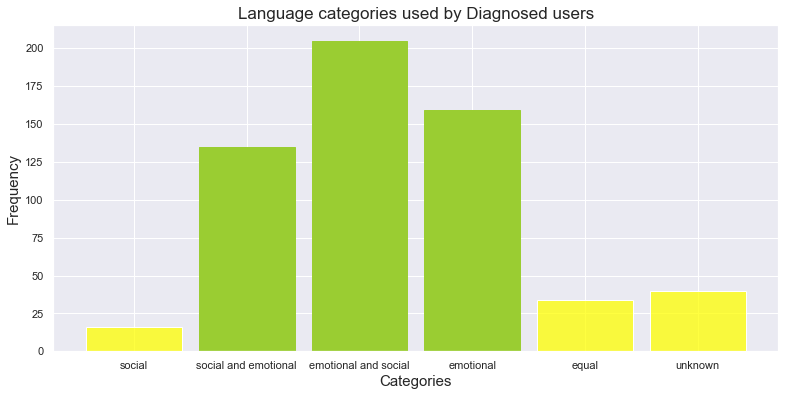

In [148]:
fig, ax = plt.subplots(figsize=(13,6))
sns.set(style="darkgrid")
data = df['lang']

ax = sns.histplot(data=data,bins=5,shrink=.85, color='yellow')

# this is not based on frequency!
heights = [p.get_height() for p in ax.patches]
third_highest = sorted(heights)[-3]
for p in ax.patches:
    if  p.get_height() >= third_highest:
        p.set_color('yellowgreen')
# https://stackoverflow.com/questions/59963831/seaborn-histogram-to-have-different-color-bins

plt.title('Language categories used by Diagnosed users', fontsize=17)
plt.xlabel('Categories', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

plt.show()

# plot 

In [45]:
# dreworbuskeridunno 551:577
# CubistIvy 21:43
# DeeGeeG 44:59
# anxious-wreck 171:250
# Lauraanthony209 510:549

# OilSoul 94:124
random_user_s = df[510:549]
random_user_s.head()

,author,num_comments,selftext,date,senti_score,lang
510,Melchior94,2,I'm 25 and I feel just... old. My whole life f...,2020-03-08,-0.925,emotional
511,Melchior94,2,I feel like I'm decaying. Things I could do on...,2020-06-14,-0.805,emotional and social
512,Melchior94,0,I just want to end this miserable experiences ...,2020-09-21,-0.440,emotional
513,Melchior94,1,There isn't anywhere I could go from here. Eve...,2020-10-18,0.894,emotional and social
514,Melchior94,0,There is just nothing I actually desire. I fee...,2020-11-19,-0.867,emotional


In [46]:
random_user_s.tail()

,author,num_comments,selftext,date,senti_score,lang
544,Planetof12,32,The fear of weight gain is the only thing keep...,2018-12-20,0.052,emotional
545,Planetof12,0,I'm diagnosed with 2 illnesses (Chronic depres...,2018-12-22,-0.976,emotional and social
546,Planetof12,8,These people love video games and 'staying ins...,2018-12-22,0.883,emotional and social
547,Planetof12,8,"I tried. Believe me, I tried. I spent so much ...",2019-01-10,0.391,social and emotional
548,Planetof12,0,Non-supportive environments have no rights to ...,2019-01-11,-0.415,emotional and social


In [47]:
score_count(random_user_s)

'positive: 11, negative: 26, neutral: 2'

In [25]:
# USER POSTS' LENGHT
average_length(random_user_s['selftext'])

NameError: name 'average_length' is not defined

In [35]:
# MOOD SWING with STANDARD DEVIATION

In [36]:
import matplotlib.pyplot as plt

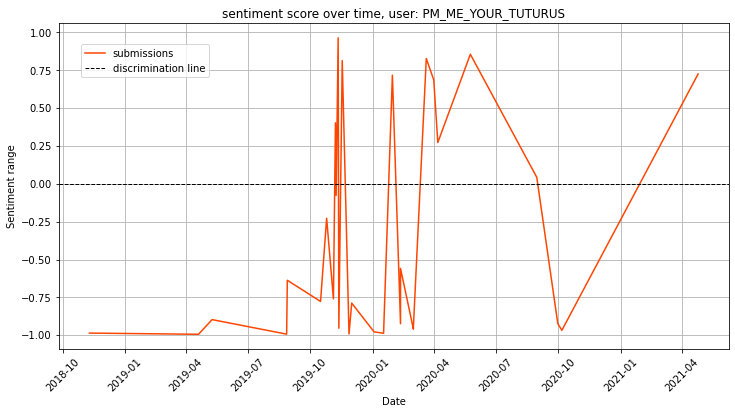

In [59]:
# create a time series plot using random_user variable
# 1) create figure and plot space
fig, ax = plt.subplots(figsize=(12,6))

# 2) add x-axis and y-axis
ax.plot(random_user_s['date'], # x-axis
        random_user_s['senti_score'],
        label = 'submissions',
        color='orangered') # y-axis

ax.axhline(0, color='k', linestyle='--', linewidth=1, label='discrimination line')

# 3) set titles and labels
ax.set(xlabel='Date',
       ylabel='Sentiment range',
       title='sentiment score over time, user: PM_ME_YOUR_TUTURUS')

plt.legend(loc='upper left', bbox_to_anchor=(.025, .95))
# ax.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')
ax.grid(True)
# plt.savefig('sentiment score over time--submissions.png')
plt.xticks(rotation = 45)
plt.show()